## 活性化関数を定義する

よく使う活性化関数、 Linear, ReLU, Sigmoid, Tanh を実装します。
ついでに微分(derivative)したものも `d_` のプレフィックスをつけて実装します(導関数)。

SigmoidやTanhは入力が大きくなると勾配が0に近づきますが、ReLUは定義からも明らかなように勾配が消えません。

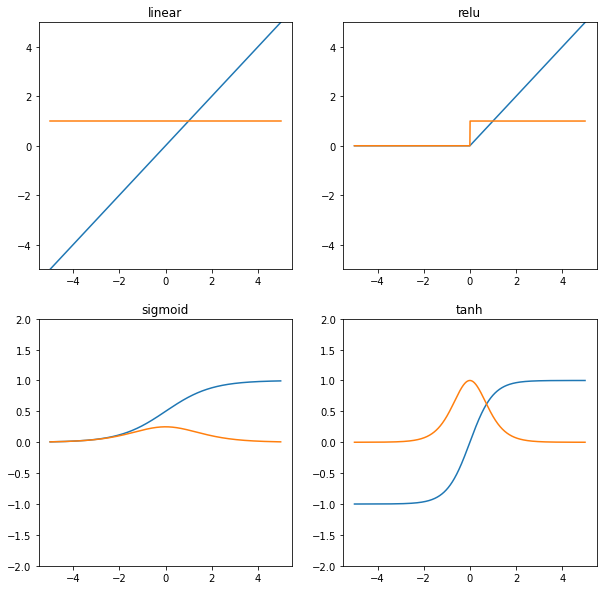

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def linear(x):
    return x

def d_linear(x):
    return np.ones(*x.shape)

def relu(x):
    return np.maximum(0, x)

def d_relu(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.tanh(x) ** 2

x = np.arange(-5, 5, 0.01)

plt.figure(figsize=(10, 10))

plt.subplot('221')
plt.ylim(-5, 5)
plt.plot(x, linear(x))
plt.plot(x, d_linear(x))
plt.title('linear')

plt.subplot('222')
plt.ylim(-5, 5)
plt.plot(x, relu(x))
plt.plot(x, d_relu(x))
plt.title('relu')

plt.subplot('223')
plt.ylim(-2, 2)
plt.plot(x, sigmoid(x))
plt.plot(x, d_sigmoid(x))
plt.title('sigmoid')

plt.subplot('224')
plt.ylim(-2, 2)
plt.plot(x, tanh(x))
plt.plot(x, d_tanh(x))
plt.title('tanh')

plt.show()

# ネットワークの構築

活性化関数が定義できたので、あとは入力と重みの積をとってバイアスを足せばニューラルネットワークのforward部分は完成です。まだ学習する能力はありませんが、とりあえず計算してみることはできます。

まず以下のように w1〜w6 と b1〜b3 を適当な値に設定して、あとは適当に計算します。このコードだとどのようなネットワークを考えているのかよくわからないと思うので、次のセルでは簡単に可視化しています。

In [2]:
x = np.arange(-10, 10, 0.01)

w1 = 2
w2 = -3
w3 = 1
b1 = 3
b2 = 2
b3 = -3

w4 = -1
w5 = -1
w6 = 3
b4 = 10

y1 = relu(w1 * x + b1)
y2 = relu(w2 * x + b2)
y3 = relu(w3 * x + b3)

y =  w4 * y1 + w5 * y2 + w6 * y3 + b4

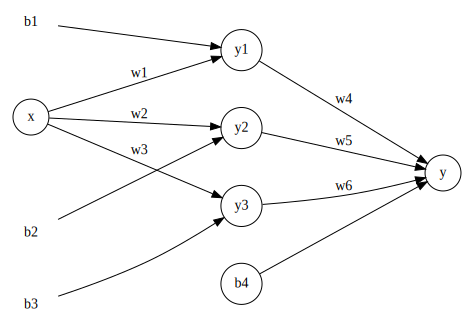

In [3]:
from graphviz import Graph
from graphviz import Digraph

g = Digraph(format='png')

g.attr('node', shape='circle')
g.attr('graph', rankdir='LR') 
g.attr('graph', ranksep='2.0')
g.attr('graph', nodesep='0.5')

g.node('x')

with g.subgraph() as s:
    s.attr(rank='same')
    s.node('y1'); s.node('y2'); s.node('y3')

with g.subgraph() as s:
    s.attr(rank='same')
    s.node('b1', shape='none'); s.node('b2', shape='none'); s.node('b3', shape='none')

s.node('b4', shape='none')
s.node('y')

g.edge('x', 'y1', label='w1'); g.edge('x', 'y2', label='w2'); g.edge('x', 'y3', label='w3')
g.edge('b1', 'y1'); g.edge('b2', 'y2'); g.edge('b3', 'y3'); g.edge('b4', 'y')
g.edge('y1', 'y', label='w4'); g.edge('y2', 'y', label='w5'); g.edge('y3', 'y', label='w6')
g

このような入力層に1つのニューロン、中間層(活性化関数はReLU)に3つのニューロン、出力層(活性化関数はLinear)に1つのニューロンがある3層のネットワークはどのような処理ができるでしょうか。これを確認するために、入力xを様々に変化させたとき、中間層の出力3つ(赤、緑、青)と、出力層の出力(黒)をプロットしてみたのが以下のグラフです。

y1, y2, y3 を組み合わせることでより複雑な形が出来上がっていることがわかります。以下の図を注意深く見ると、この場合は3箇所で折れ曲がっている折れ線グラフのような形が描けることがわかります。

このようにReLUを使っている場合は、学習したい関数を折れ線で近似するような能力があることがわかります(区分線形近似)。

また、今回のように3つのニューロンではなく、N個のニューロンを用意すればN箇所で折れ曲がる折れ線が引けるので、Nを無限に大きくしていくとどんどん複雑な線が引けることがわかります。理論的には、中間層に十分な数のニューロンがある3層のネットワークは、いくつかの条件のもとで、任意の連続な関数を任意の精度で近似できる能力を持っています（**万能近似定理**）。


(-10.0, 10.0)

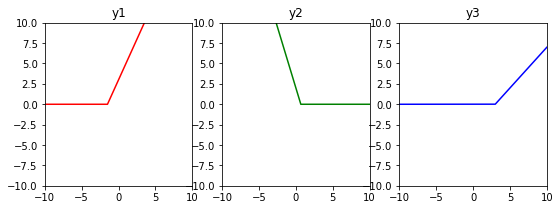

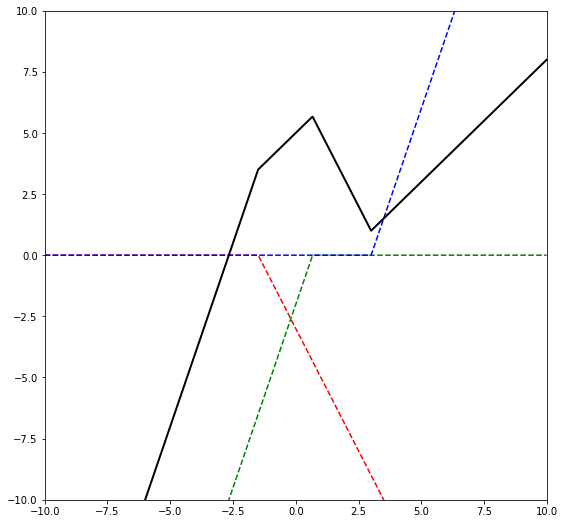

In [4]:
plt.figure(figsize=(9,3))
plt.subplot('131'); plt.xlim(-10, 10); plt.ylim(-10, 10)
plt.plot(x, y1, c='r'); plt.title('y1')
plt.subplot('132'); plt.xlim(-10, 10); plt.ylim(-10, 10)
plt.plot(x, y2, c='g'); plt.title('y2')
plt.subplot('133'); plt.xlim(-10, 10); plt.ylim(-10, 10)
plt.plot(x, y3, c='b'); plt.title('y3')

plt.figure(figsize=(9,9))
plt.plot(x, w4 * y1, c='r', linestyle='dashed')
plt.plot(x, w5 * y2, c='g', linestyle='dashed')
plt.plot(x, w6 * y3, c='b', linestyle='dashed')
plt.plot(x, y, c='k', linewidth=2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

重みやバイアスを変更することで本当に好きなように線が引けるのかどうかを検証できるようにインタラクティブなバージョンも用意しました。画面右のスライダで重みやバイアスを変更してから実行してみてください。

(-10.0, 10.0)

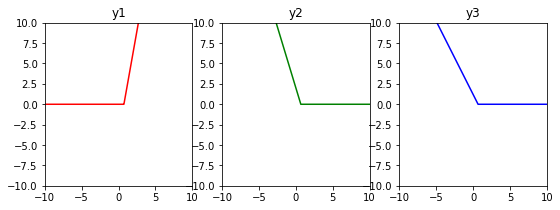

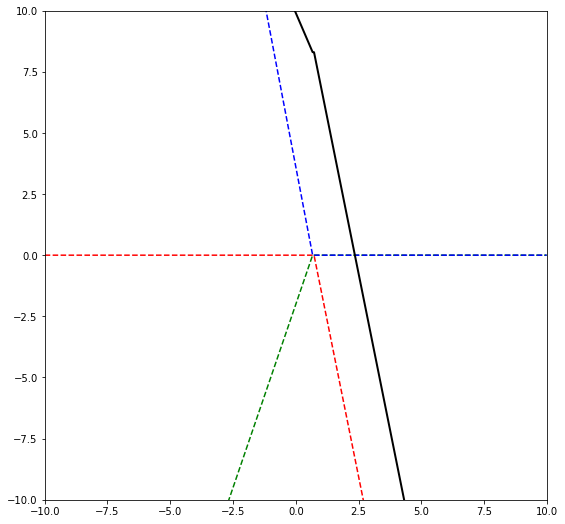

In [5]:
x = np.arange(-10, 10, 0.01)

w1 = 5.1 # @param {type: "slider", min:-10, max:10, step:0.1}
b1 = -3.7 # @param {type: "slider", min:-10, max:10, step:0.1}
w2 = -3.0 # @param {type: "slider", min:-10, max:10, step:0.1}
b2 = 2.0 # @param {type: "slider", min:-10, max:10, step:0.1}
w3 = -1.8 # @param {type: "slider", min:-10, max:10, step:0.1}
b3 = 1.2 # @param {type: "slider", min:-10, max:10, step:0.1}

w4 = -1 # @param {type: "slider", min:-10, max:10, step:0.1}
w5 = -1 # @param {type: "slider", min:-10, max:10, step:0.1}
w6 = 3 # @param {type: "slider", min:-10, max:10, step:0.1}
b4 = 8.3 # @param {type: "slider", min:-10, max:10, step:0.1}

y1 = relu(w1 * x + b1) 
y2 = relu(w2 * x + b2)
y3 = relu(w3 * x + b3)

plt.figure(figsize=(9,3))
plt.subplot('131'); plt.xlim(-10, 10); plt.ylim(-10, 10)
plt.plot(x, y1, c='r'); plt.title('y1')
plt.subplot('132'); plt.xlim(-10, 10); plt.ylim(-10, 10)
plt.plot(x, y2, c='g'); plt.title('y2')
plt.subplot('133'); plt.xlim(-10, 10); plt.ylim(-10, 10)
plt.plot(x, y3, c='b'); plt.title('y3')

plt.figure(figsize=(9,9))
y =  w4 * y1 + w5 * y2 + w6 * y3 + b4
plt.plot(x, w4 * y1, c='r', linestyle='dashed')
plt.plot(x, w5 * y2, c='g', linestyle='dashed')
plt.plot(x, w6 * y3, c='b', linestyle='dashed')
plt.plot(x, y, c='k', linewidth=2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

## 行列計算によるNNの簡単な実装

これまでに見てきたようなやりかただとプログラムが面倒なので、各層ごとに重みをひとまとめにし、さらに入出力もひとまとめに扱うようにします。

下記の例では、入力層、中間層、出力層がそれぞれ2つのニューロンからなる3層のニューラルネットワークに、入力として(1,2)と(-3,-4)を入れた結果が(25, -32)と(13,38)であることを表しています。中間層の活性化関数はReLU, 出力層の活性化関数は Linear です。

![代替テキスト](https://dl.dropboxusercontent.com/s/3m3xhc6j9vfllqu/nn_sample.png)


In [6]:

W1 = np.array([
      [1, -2],
      [-3, 4]
])

b1 = np.array([1, 2])

W2 = np.array([
      [2, 3],
      [4, -5]     
])

b2 = np.array([-7 , 8])

X = np.array([
     [1, 2],
     [-3, -4]
])

print('X=')
print(X)
print('↓')

print('xW+b = ')
V1 = np.dot(X, W1) + b1
print(V1)
print('↓')

print('φ(xW+b) = ')
Z1 = relu(V1)
print(Z1)
print('↓')

print('xW+b = ')
V2 = np.dot(Z1, W2) + b2
print(V2)
print('↓')

print('y = ')
print(V2)

X=
[[ 1  2]
 [-3 -4]]
↓
xW+b = 
[[-4  8]
 [10 -8]]
↓
φ(xW+b) = 
[[ 0  8]
 [10  0]]
↓
xW+b = 
[[ 25 -32]
 [ 13  38]]
↓
y = 
[[ 25 -32]
 [ 13  38]]


## 注釈

### 万能近似定理について

万能近似定理は、入力ベクトルxを受け取って実数yを出力する3層のニューラルネットワークは、どんな問題であってもいくらでも精度よく近似できるということを言っています。

万能近似定理については、上記では「無限に折れる折れ線」で示しましたが、より一般的な証明としては階段関数を使ったものが有名です。

もしニューロンを使って階段関数
$$ \phi_{\mathrm{step}}(x) = \left\{ \begin{array}{ll} 0 & (x<0) \\ 1 & (x\geq1) \end{array} \right. $$
を表現できたとすると、これを組み合わせることで多数の矩形関数を組み合わせた形が作れる、という性質を利用します。 `sigmoid` や `tanh` では傾きを無限にすると階段関数が得られますし、 `ReLU` の場合は2つの出力を組み合わせることで階段関数を作ることができるので、この方法で証明できます。

ただし、これは重みを無限にしたニューロンを無限に用意しないといけないので実際にこのようにニューラルネットワークが学習されているわけではなく、あくまでもニューラルネットワークは最大これくらいのポテンシャルを持っている、ということを示すためだと考えましょう。